In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd

In [39]:
df_penguins = sns.load_dataset('penguins')
df_penguins = df_penguins.dropna()
df_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [40]:
features = df_penguins.columns[1:]
features

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [41]:
targets = df_penguins['species'].unique()
targets

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

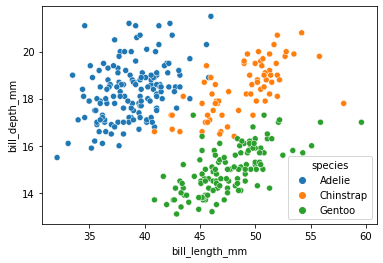

In [42]:
sns.scatterplot(data=df_penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')

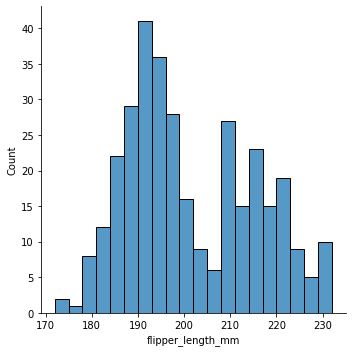

In [43]:
sns.displot(df_penguins, x="flipper_length_mm", binwidth=3)

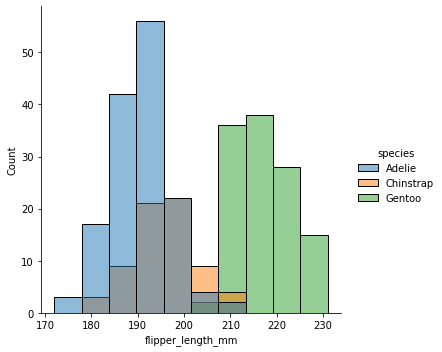

In [44]:
sns.displot(df_penguins, x="flipper_length_mm", hue="species")


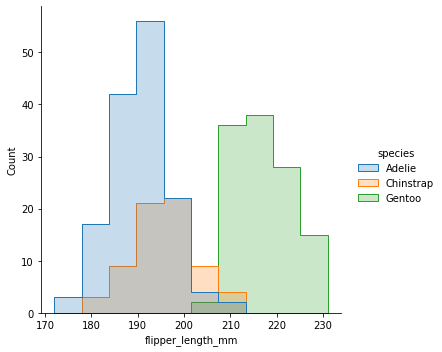

In [45]:
sns.displot(df_penguins, x="flipper_length_mm", hue="species",  element="step")

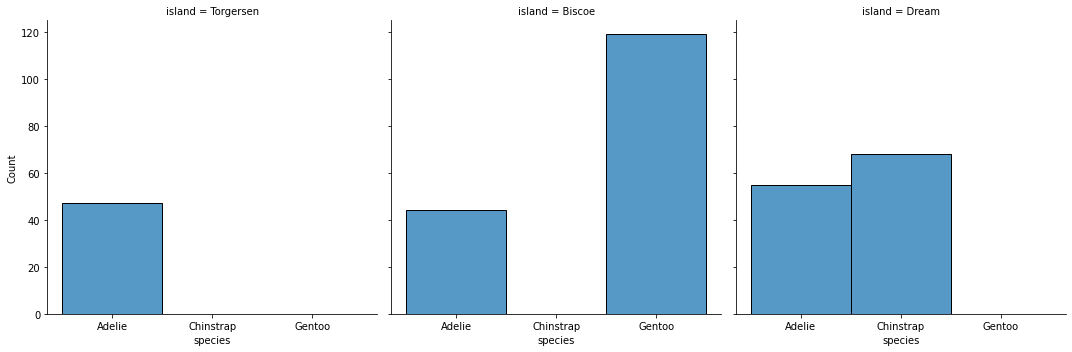

In [46]:
sns.displot(df_penguins, x="species", col="island") 

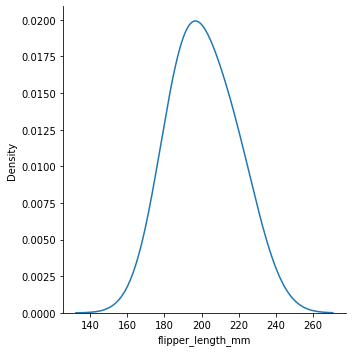

In [47]:
sns.displot(df_penguins, x="flipper_length_mm", kind="kde", bw_adjust=3)

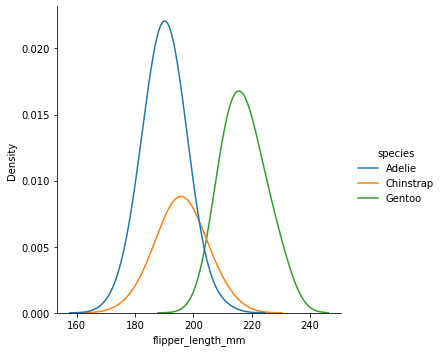

In [48]:
sns.displot(df_penguins, x="flipper_length_mm", hue = "species", kind="kde",  bw_adjust=2)

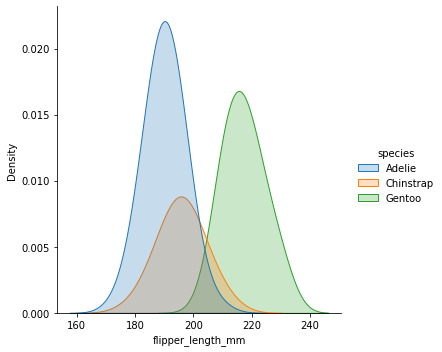

In [49]:
sns.displot(df_penguins, x="flipper_length_mm", hue = "species", kind="kde",  bw_adjust=2, fill = True)

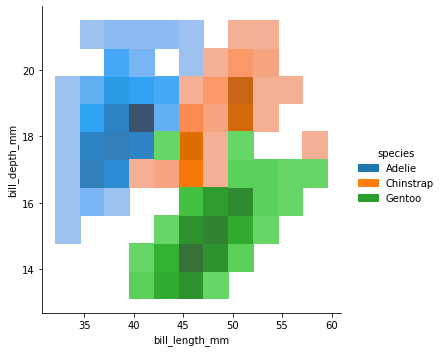

In [50]:
sns.displot(df_penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

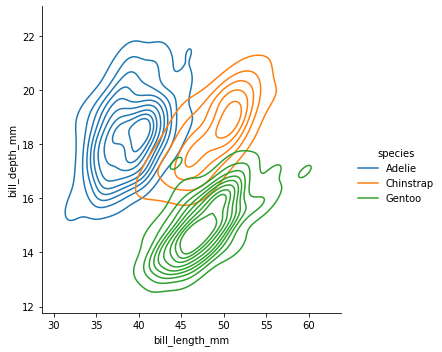

In [51]:
sns.displot(df_penguins, x="bill_length_mm", y="bill_depth_mm", hue = "species", kind = 'kde')

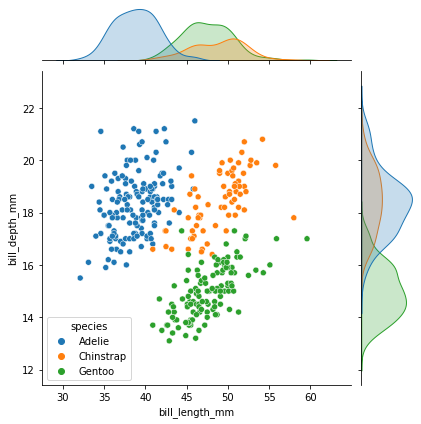

In [52]:
sns.jointplot(data=df_penguins, x="bill_length_mm", y="bill_depth_mm", hue = "species")

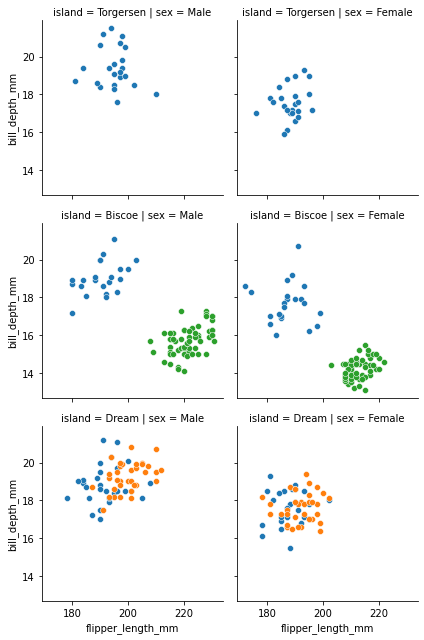

In [53]:
g = sns.FacetGrid(df_penguins, row = 'island', col="sex", hue = "species")
g.map(sns.scatterplot, "flipper_length_mm", "bill_depth_mm")

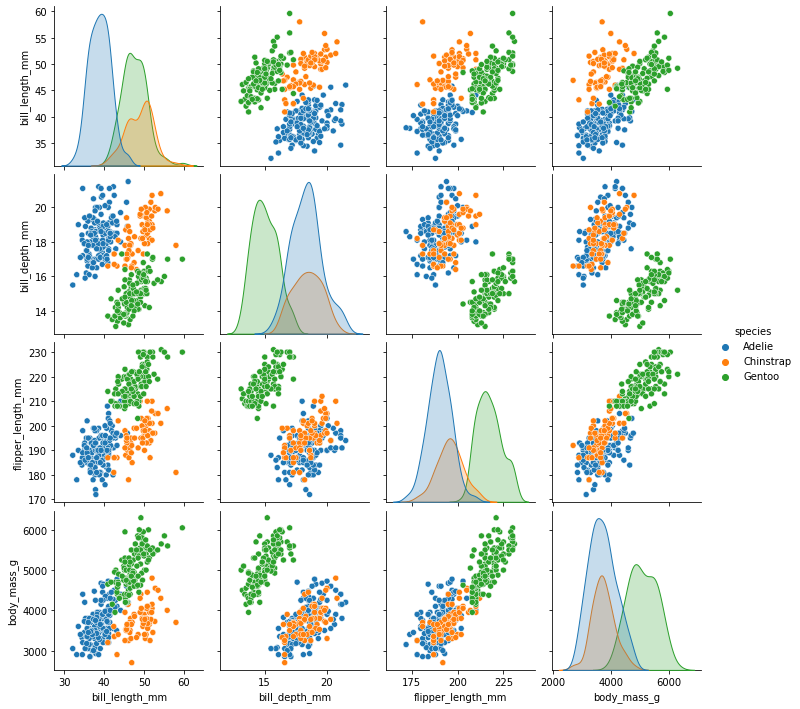

In [54]:
sns.pairplot(data = df_penguins,vars = df_penguins.columns[2:6], hue='species')

In [66]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_penguins['sex'] = le.fit_transform(df_penguins.sex.values)
df_penguins['island'] = le.fit_transform(df_penguins.island.values)
df_penguins['species'] = le.fit_transform(df_penguins.species.values)
X = df_penguins[features]
Y = df_penguins['species']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size = 0.25, train_size = 0.75, random_state =75)

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

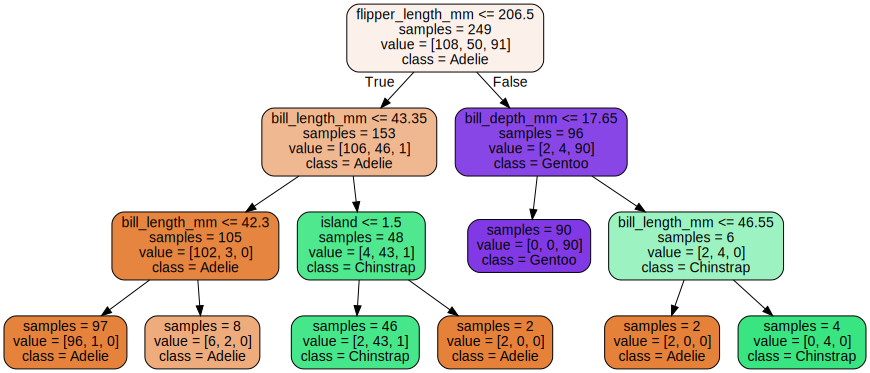

In [68]:
model = DecisionTreeClassifier(max_depth=3, random_state=23)
model.fit(X_Train, Y_Train)

from graphviz import Source
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='penguins.dot', feature_names=features , class_names=targets, impurity=False,
                filled=True, rounded=True)
Source.from_file('penguins.dot')

In [69]:
for i in range (1,7):
     model  = DecisionTreeClassifier(max_depth=i, random_state=52)
     model.fit(X_Train, Y_Train)
     Y_Predict = model.predict(X_Test)
     print(accuracy_score(Y_Test, Y_Predict))

0.7857142857142857
0.9761904761904762
0.9761904761904762
1.0
0.9880952380952381
0.9880952380952381


In [61]:
# Nhận xét hyperparameter max_depth
# max_depth thể hiện chiều sâu của cây
# Cây càng sâu thì càng có nhiều nhánh và sẽ sử dụng nhiều thông tin từ bộ dữ liệu hơn
# Tuy nhiên, về tổng quan thì cây quyết định sẽ  bị overfitting nếu tham số max_depth lớn. Khi này, cây quyết định sẽ dự đoán chính xác tuyệt đối dữ liệu dùng để trainning.
# tuy nhiên sẽ dự đoán sai với một bộ dữ liệu mới nên độ chính xác sẽ giảm dần